In [1]:
from asyncio import transports
from http import client
from urllib import response
import pandas as pd
from rsa import verify
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport

In [2]:
sample = RequestsHTTPTransport(
    url='https://api.thegraph.com/subgraphs/name/muranox/uniswap-v3-matic',
    verify=True
)
client=Client(
    transport=sample
)

In [3]:
query=gql('''
query{
    pools{
        createdAtTimestamp
        feeTier
        liquidity
        volumeUSD
        volumeToken0
        volumeToken1
        feesUSD
    }
}
''')
response=client.execute(query)

In [4]:
pools=[]
for i in response['pools']:
    pools.append([
        i['createdAtTimestamp'],
        i['feeTier'],
        i['liquidity'],
        i['volumeUSD'],
        i['volumeToken0'],
        i['volumeToken1'],
        i['feesUSD']
    ])

df=pd.DataFrame(pools)
df.columns=['createdAtTimestamp','feeTier','liquidity','volumeUSD','volumeToken0','volumeToken1','feesUSD']
print(df.head())

  createdAtTimestamp feeTier liquidity volumeUSD            volumeToken0  \
0         1641120448   10000         0         0                       0   
1         1643118382   10000         0         0                       0   
2         1640209905    3000         0         0    0.076588481410774537   
3         1640310980    3000         0         0    0.033032642189158098   
4         1643143052   10000         0         0  273.514799165854734372   

                volumeToken1 feesUSD  
0                          0       0  
1                          0       0  
2   23247.418369187447350224       0  
3  443163.112284470030214466       0  
4       0.195579936567254241       0  


In [5]:
import time
import datetime
import numpy as np
from datetime import datetime
from datetime import datetime, timedelta
from datetime import date, timedelta
from datetime import timezone  

today=datetime.now()
three_mons = pd.Timestamp(today - timedelta(days=90))
df['createdAtTimestamp'] = df['createdAtTimestamp'].astype('str').astype('int')
df['createdAtTimestamp'] = df['createdAtTimestamp'].map(lambda x: datetime.utcfromtimestamp(x).replace(tzinfo=timezone.utc))
df['createdAtTimestamp'] = df['createdAtTimestamp'].map(lambda x: np.datetime64(str(x)).astype(datetime))
print(df['createdAtTimestamp'])

0    2022-01-02 10:47:28
1    2022-01-25 13:46:22
2    2021-12-22 21:51:45
3    2021-12-24 01:56:20
4    2022-01-25 20:37:32
             ...        
95   2022-02-10 01:13:35
96   2022-02-04 10:38:47
97   2021-12-25 01:11:41
98   2021-12-23 20:12:48
99   2022-01-05 01:20:59
Name: createdAtTimestamp, Length: 100, dtype: datetime64[ns]


C:\Users\akshu\AppData\Local\Temp/ipykernel_14448/2989354589.py:13: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  df['createdAtTimestamp'] = df['createdAtTimestamp'].map(lambda x: np.datetime64(str(x)).astype(datetime))


In [6]:
df['createdAtTimestamp'] = pd.to_datetime(df['createdAtTimestamp'])
df=df[df['createdAtTimestamp'] >= three_mons]
print(df.head())

   createdAtTimestamp feeTier liquidity volumeUSD            volumeToken0  \
0 2022-01-02 10:47:28   10000         0         0                       0   
1 2022-01-25 13:46:22   10000         0         0                       0   
2 2021-12-22 21:51:45    3000         0         0    0.076588481410774537   
3 2021-12-24 01:56:20    3000         0         0    0.033032642189158098   
4 2022-01-25 20:37:32   10000         0         0  273.514799165854734372   

                volumeToken1 feesUSD  
0                          0       0  
1                          0       0  
2   23247.418369187447350224       0  
3  443163.112284470030214466       0  
4       0.195579936567254241       0  


In [7]:
print(len(df['liquidity'].unique()),len(df['volumeUSD'].unique()),len(df['volumeToken0'].unique()),len(df['volumeToken1'].unique()),df['feesUSD'].unique())

42 1 81 81 ['0']


In [8]:
#volumeUSD and feesUSD columns have all zero values. so we're not going to plot them
''' 1. Liquidity
    2. volumeUSD
    3. VolumeToken0
    4. VolumeToken1
    5. FeesUSD/Liquidity
    6. FeesUSD/volumeUSD
    
only 1,3,4 can be plotted'''

df=df.drop('volumeUSD',axis=1)
df=df.drop('feesUSD',axis=1)

In [9]:
df["feeTier"]=df['feeTier'].astype(int)
df["liquidity"]=df['liquidity'].astype(float)
df["volumeToken0"]=df['volumeToken0'].astype(float)
df["volumeToken1"]=df['volumeToken1'].astype(float)

In [10]:
df.dtypes

createdAtTimestamp    datetime64[ns]
feeTier                        int32
liquidity                    float64
volumeToken0                 float64
volumeToken1                 float64
dtype: object

In [11]:
df=df.groupby(by=df['createdAtTimestamp'].dt.date).mean()

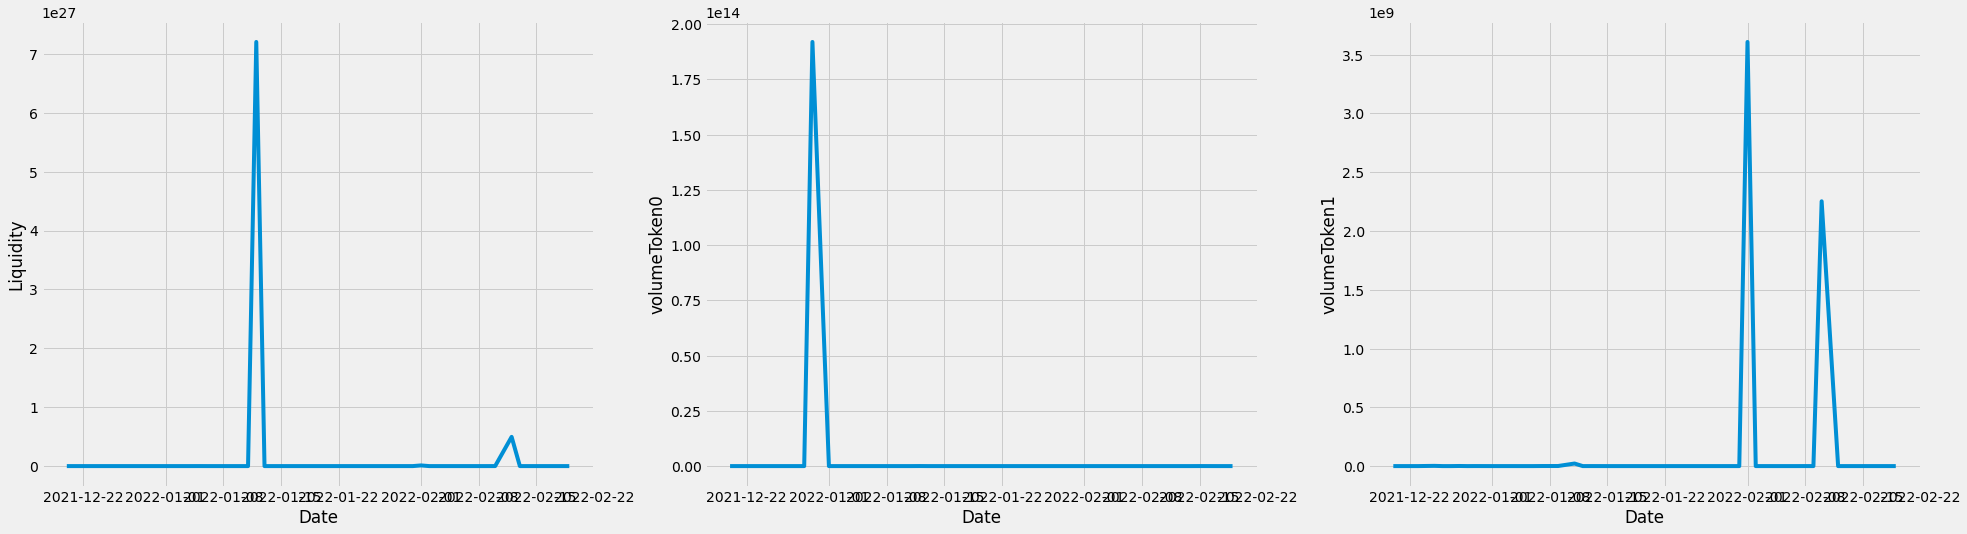

In [12]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(30, 8))
 
# Labelling the axes and setting
plt.subplot(1,3,1)
plt.xlabel("Date")
plt.ylabel("Liquidity")
plt.plot(df["liquidity"])

plt.subplot(1,3,2)
plt.xlabel("Date")
plt.ylabel("volumeToken0")
plt.plot(df["volumeToken0"])

plt.subplot(1,3,3)
plt.xlabel("Date")
plt.ylabel("volumeToken1")
plt.plot(df["volumeToken1"])